In [10]:
"""Chapter 7"""

'Chapter 7'

In [2]:
import numpy as np
PI2 = 2 * np.pi

In [3]:
ys = [-0.5, 0.1, 0.7, -0.1]
hs = np.fft.fft(ys)
print(hs)

[ 0.2+0.j  -1.2-0.2j  0.2+0.j  -1.2+0.2j]


In [4]:
def dft(ys):
    N = len(ys)
    ts = np.arange(N) / N
    freqs = np.arange(N)
    args = np.outer(ts, freqs)
    M = np.exp(1j * PI2 * args)
    amps = M.conj().transpose().dot(ys)
    return amps

In [5]:
hs2 = dft(ys)
np.sum(np.abs(hs - hs2))

5.864775846765962e-16

In [6]:
def fft_norec(ys):
    N = len(ys)
    He = np.fft.fft(ys[::2])
    Ho = np.fft.fft(ys[1::2])
    
    ns = np.arange(N)
    W = np.exp(-1j * PI2 * ns / N)
    
    return np.tile(He, 2) + W * np.tile(Ho, 2)

In [7]:
hs3 = fft_norec(ys)
np.sum(np.abs(hs - hs3))

0.0

In [8]:
def fft(ys):
    N = len(ys)
    if N == 1:
        return ys
    
    He = fft(ys[::2])
    Ho = fft(ys[1::2])
    
    ns = np.arange(N)
    W = np.exp(-1j * PI2 * ns / N)
    
    return np.tile(He, 2) + W * np.tile(Ho, 2)

In [9]:
hs4 = fft(ys)
np.sum(np.abs(hs - hs4))

1.6653345369377348e-16

In [11]:
"""Chapter8"""

'Chapter8'

In [32]:
"""Ex:8.1"""

'Ex:8.1'

In [13]:
import os

if not os.path.exists('thinkdsp.py'):
   !wget https://gitlab.com/mehsan1997/signal-processing/-/raw/master/thinkdsp.py

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

In [31]:
"""Ex:8.2"""

'Ex:8.2'

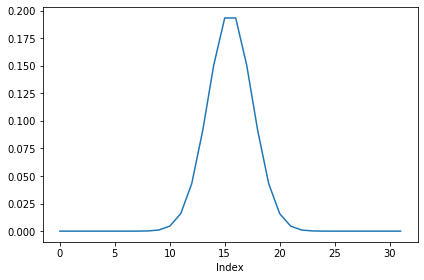

In [15]:
import scipy.signal

gaussian = scipy.signal.gaussian(M=32, std=2)
gaussian /= sum(gaussian)
plt.plot(gaussian)
decorate(xlabel='Index')

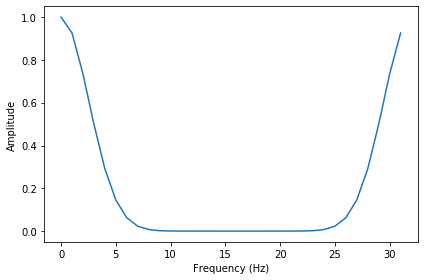

In [16]:
fft_gaussian = np.fft.fft(gaussian)
plt.plot(abs(fft_gaussian))
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

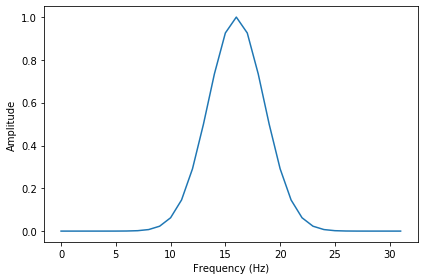

In [17]:
N = len(gaussian)
fft_rolled = np.roll(fft_gaussian, N//2)
plt.plot(abs(fft_rolled))
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

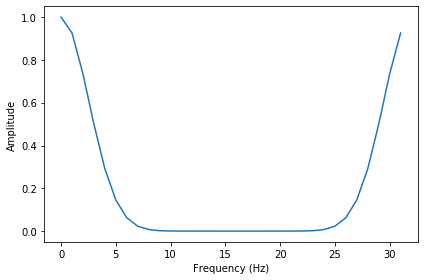

In [18]:
fft_gaussian = np.fft.fft(gaussian)
plt.plot(abs(fft_gaussian))
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

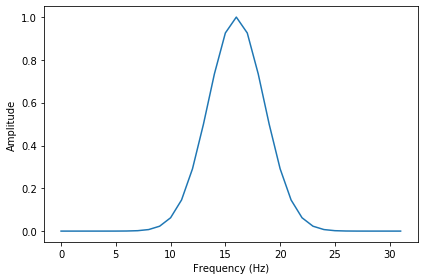

In [19]:
N = len(gaussian)
fft_rolled = np.roll(fft_gaussian, N//2)
plt.plot(abs(fft_rolled))
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

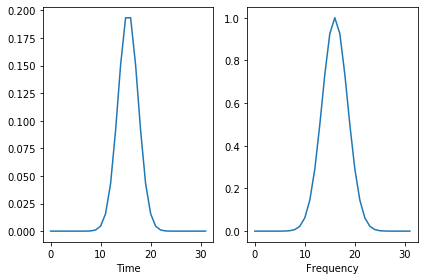

In [20]:
def plot_gaussian(std):
    M = 32
    gaussian = scipy.signal.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)
    
    plt.subplot(1, 2, 1)
    plt.plot(gaussian)
    decorate(xlabel='Time')

    fft_gaussian = np.fft.fft(gaussian)
    fft_rolled = np.roll(fft_gaussian, M//2)
    
    plt.subplot(1, 2, 2)
    plt.plot(np.abs(fft_rolled))
    decorate(xlabel='Frequency')
    plt.show()

plot_gaussian(2)

In [21]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider = widgets.FloatSlider(min=0.1, max=10, value=2)
interact(plot_gaussian, std=slider);

interactive(children=(FloatSlider(value=2.0, description='std', max=10.0, min=0.1), Output()), _dom_classes=('…

In [22]:
"""Ex:8.3"""

'Ex:8.3'

In [23]:

from thinkdsp import SquareSignal

signal = SquareSignal(freq=440)
wave = signal.make_wave(duration=1.0, framerate=44100)

In [24]:
M = 15
std = 2.5

gaussian = scipy.signal.gaussian(M=M, std=std)   
bartlett = np.bartlett(M)
blackman = np.blackman(M)
hamming = np.hamming(M)
hanning = np.hanning(M)

windows = [blackman, gaussian, hanning, hamming]
names = ['blackman', 'gaussian', 'hanning', 'hamming']

for window in windows:
    window /= sum(window)

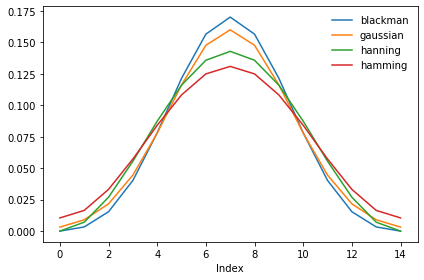

In [25]:
for window, name in zip(windows, names):
    plt.plot(window, label=name)

decorate(xlabel='Index')

In [26]:
def zero_pad(array, n):
    """Extends an array with zeros.

    array: NumPy array
    n: length of result

    returns: new NumPy array
    """
    res = np.zeros(n)
    res[:len(array)] = array
    return res

In [27]:
def plot_window_dfts(windows, names):
    """
    """
    for window, name in zip(windows, names):
        padded =  zero_pad(window, len(wave))
        dft_window = np.fft.rfft(padded)
        plt.plot(abs(dft_window), label=name)

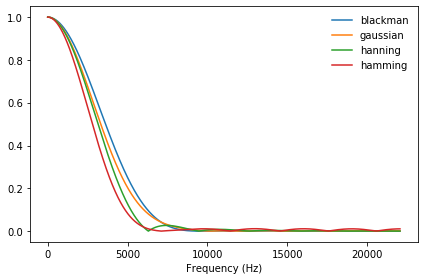

In [28]:
plot_window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)')

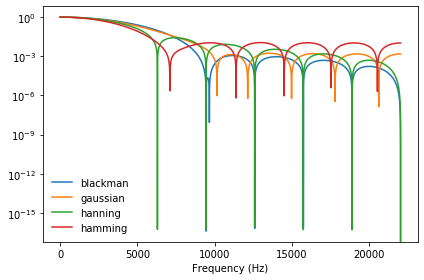

In [29]:
plot_window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)', yscale='log')